# CMPT 459 : Milestone 1 

In [1]:
###   imports   ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
###   raw url   ###

cases_2021_test_url  = 'https://raw.githubusercontent.com/shumanpng/CMPT459-D100-SPRING2022/main/dataset/cases_2021_test.csv'
cases_2021_train_url = 'https://raw.githubusercontent.com/shumanpng/CMPT459-D100-SPRING2022/main/dataset/cases_2021_train.csv'
location_2021_url    = 'https://raw.githubusercontent.com/shumanpng/CMPT459-D100-SPRING2022/main/dataset/location_2021.csv'

In [3]:
###   read dataset   ###

cases_2021_test = pd.read_csv(cases_2021_test_url)
cases_2021_train = pd.read_csv(cases_2021_train_url)
location_2021 = pd.read_csv(location_2021_url)

In [4]:
###   cleaning messy outcome before EDA   ###

hospitalized = ['Discharged', 'Discharged from hospital', 'Hospitalized', 'critical condition', 'discharge', 'discharged']
nonhospitalized = ['Alive', 'Receiving Treatment', 'Stable', 'Under treatment', 'recovering at home 03.03.2020', 
                   'released from quarantine', 'stable', 'stable condition']
deceased = ['Dead', 'Death', 'Deceased', 'Died', 'death', 'died']
recovered = ['Recovered', 'recovered']

cases_2021_train.loc[cases_2021_train['outcome'].isin(hospitalized), 'outcome_group'] = 'hospitalized'
cases_2021_train.loc[cases_2021_train['outcome'].isin(nonhospitalized), 'outcome_group'] = 'nonhospitalized'
cases_2021_train.loc[cases_2021_train['outcome'].isin(deceased), 'outcome_group'] = 'deceased'
cases_2021_train.loc[cases_2021_train['outcome'].isin(recovered), 'outcome_group'] = 'recovered'
cases_2021_train = cases_2021_train.drop(['outcome'], axis=1)
cases_2021_train.head(5)

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
0,NaN,NaN,Maharashtra,India,19.20000,72.96667,23.05.2020,NaN,NaN,False,hospitalized
1,NaN,NaN,Maharashtra,India,18.94017,72.83483,18.05.2020,NaN,https://t.me/indiacovid/5075,False,recovered
2,NaN,NaN,Maharashtra,India,19.20000,72.96667,28.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,False,hospitalized
3,NaN,NaN,West Bengal,India,22.80862,88.79242,09.05.2020,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,False,hospitalized
4,NaN,NaN,Maharashtra,India,18.94017,72.83483,17.05.2020,NaN,NaN,False,hospitalized


### 1.3 Exploratory Data Analysis

Cases Dataset

In [5]:
cases_2021_train.head()

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
0,NaN,NaN,Maharashtra,India,19.20000,72.96667,23.05.2020,NaN,NaN,False,hospitalized
1,NaN,NaN,Maharashtra,India,18.94017,72.83483,18.05.2020,NaN,https://t.me/indiacovid/5075,False,recovered
2,NaN,NaN,Maharashtra,India,19.20000,72.96667,28.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,False,hospitalized
3,NaN,NaN,West Bengal,India,22.80862,88.79242,09.05.2020,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,False,hospitalized
4,NaN,NaN,Maharashtra,India,18.94017,72.83483,17.05.2020,NaN,NaN,False,hospitalized


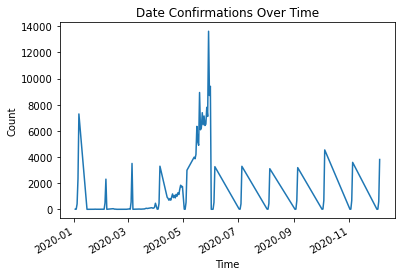

In [6]:
dates = cases_2021_train[cases_2021_train['date_confirmation'].isna() == False]
dates = dates[dates['date_confirmation'].str.contains('-') == False]
dates = pd.to_datetime(dates['date_confirmation'])
dates = dates.value_counts().sort_index()
plt.title('Date Confirmations Over Time')
dates.plot(xlabel = 'Time',ylabel = 'Count')
plt.show()

In [7]:
missing_prov = cases_2021_train[cases_2021_train['province'].isna() == True]['country'].value_counts().rename_axis('Country').reset_index(name='No_province_count')
country_counts = cases_2021_train['country'].value_counts().rename_axis('Country').reset_index(name='Country_count')

missing_prov = missing_prov.merge(country_counts, on='Country')
missing_prov['Missing_prov_per'] = missing_prov['No_province_count']/missing_prov['Country_count']

missing_prov.sort_values(by='Missing_prov_per', ascending=False)

,Country,No_province_count,Country_count,Missing_prov_per
15,Sudan,4,4,1.000000
14,Gambia,5,5,1.000000
28,United Arab Emirates,1,1,1.000000
27,Central African Republic,1,1,1.000000
25,Nepal,1,1,1.000000
24,Djibouti,2,2,1.000000
22,Cabo Verde,2,2,1.000000
21,Mozambique,2,2,1.000000
20,Guinea-Bissau,2,2,1.000000
19,Gabon,2,2,1.000000


Overall Mean Age: 37.75719267654752


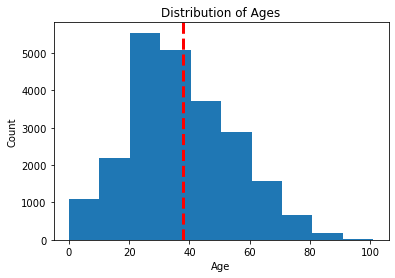

In [8]:
age = cases_2021_train[cases_2021_train['age'].str.contains('-') == False]['age'].astype(float).astype(int)

age.value_counts()
plt.figure()
plt.title("Distribution of Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.hist(age)
plt.axvline(x=age.mean(), color='r', linestyle='dashed', linewidth=3)
#plt.savefig(output_filename)

print("Overall Mean Age: " + str(age.mean()))

Female Mean Age: 37.687906691221606


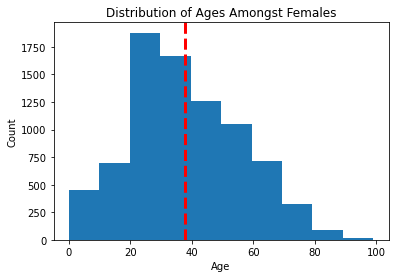

In [9]:
age_female = cases_2021_train[cases_2021_train['sex'] == "female"]
age_female =  age_female[age_female['age'].str.contains('-') == False]['age'].astype(float).astype(int)

age.value_counts()
plt.figure()
plt.title("Distribution of Ages Amongst Females")
plt.xlabel("Age")
plt.ylabel("Count")
plt.hist(age_female)
plt.axvline(x=age_female.mean(), color='r', linestyle='dashed', linewidth=3)
#plt.savefig(output_filename)

print("Female Mean Age: " + str(age_female.mean()))

Male Mean Age: 37.836584854206


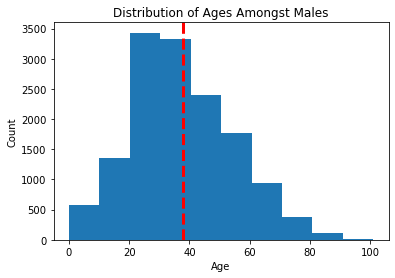

In [10]:
age_male = cases_2021_train[cases_2021_train['sex'] == "male"]
age_male =  age_male[age_male['age'].str.contains('-') == False]['age'].astype(float).astype(int)

age.value_counts()
plt.figure()
plt.title("Distribution of Ages Amongst Males")
plt.xlabel("Age")
plt.ylabel("Count")
plt.hist(age_male)
plt.axvline(x=age_male.mean(), color='r', linestyle='dashed', linewidth=3)
#plt.savefig(output_filename)

print("Male Mean Age: " + str(age_male.mean()))

Total number of individual in each outcome group


hospitalized       135726
recovered           65310
deceased             4031
nonhospitalized       779
Name: outcome_group, dtype: int64

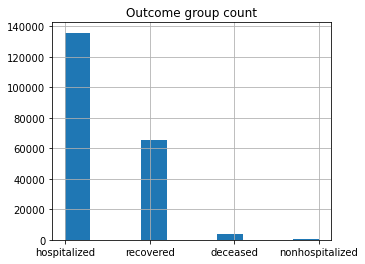

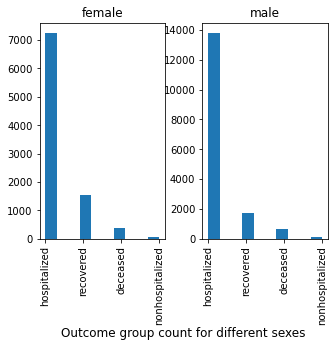

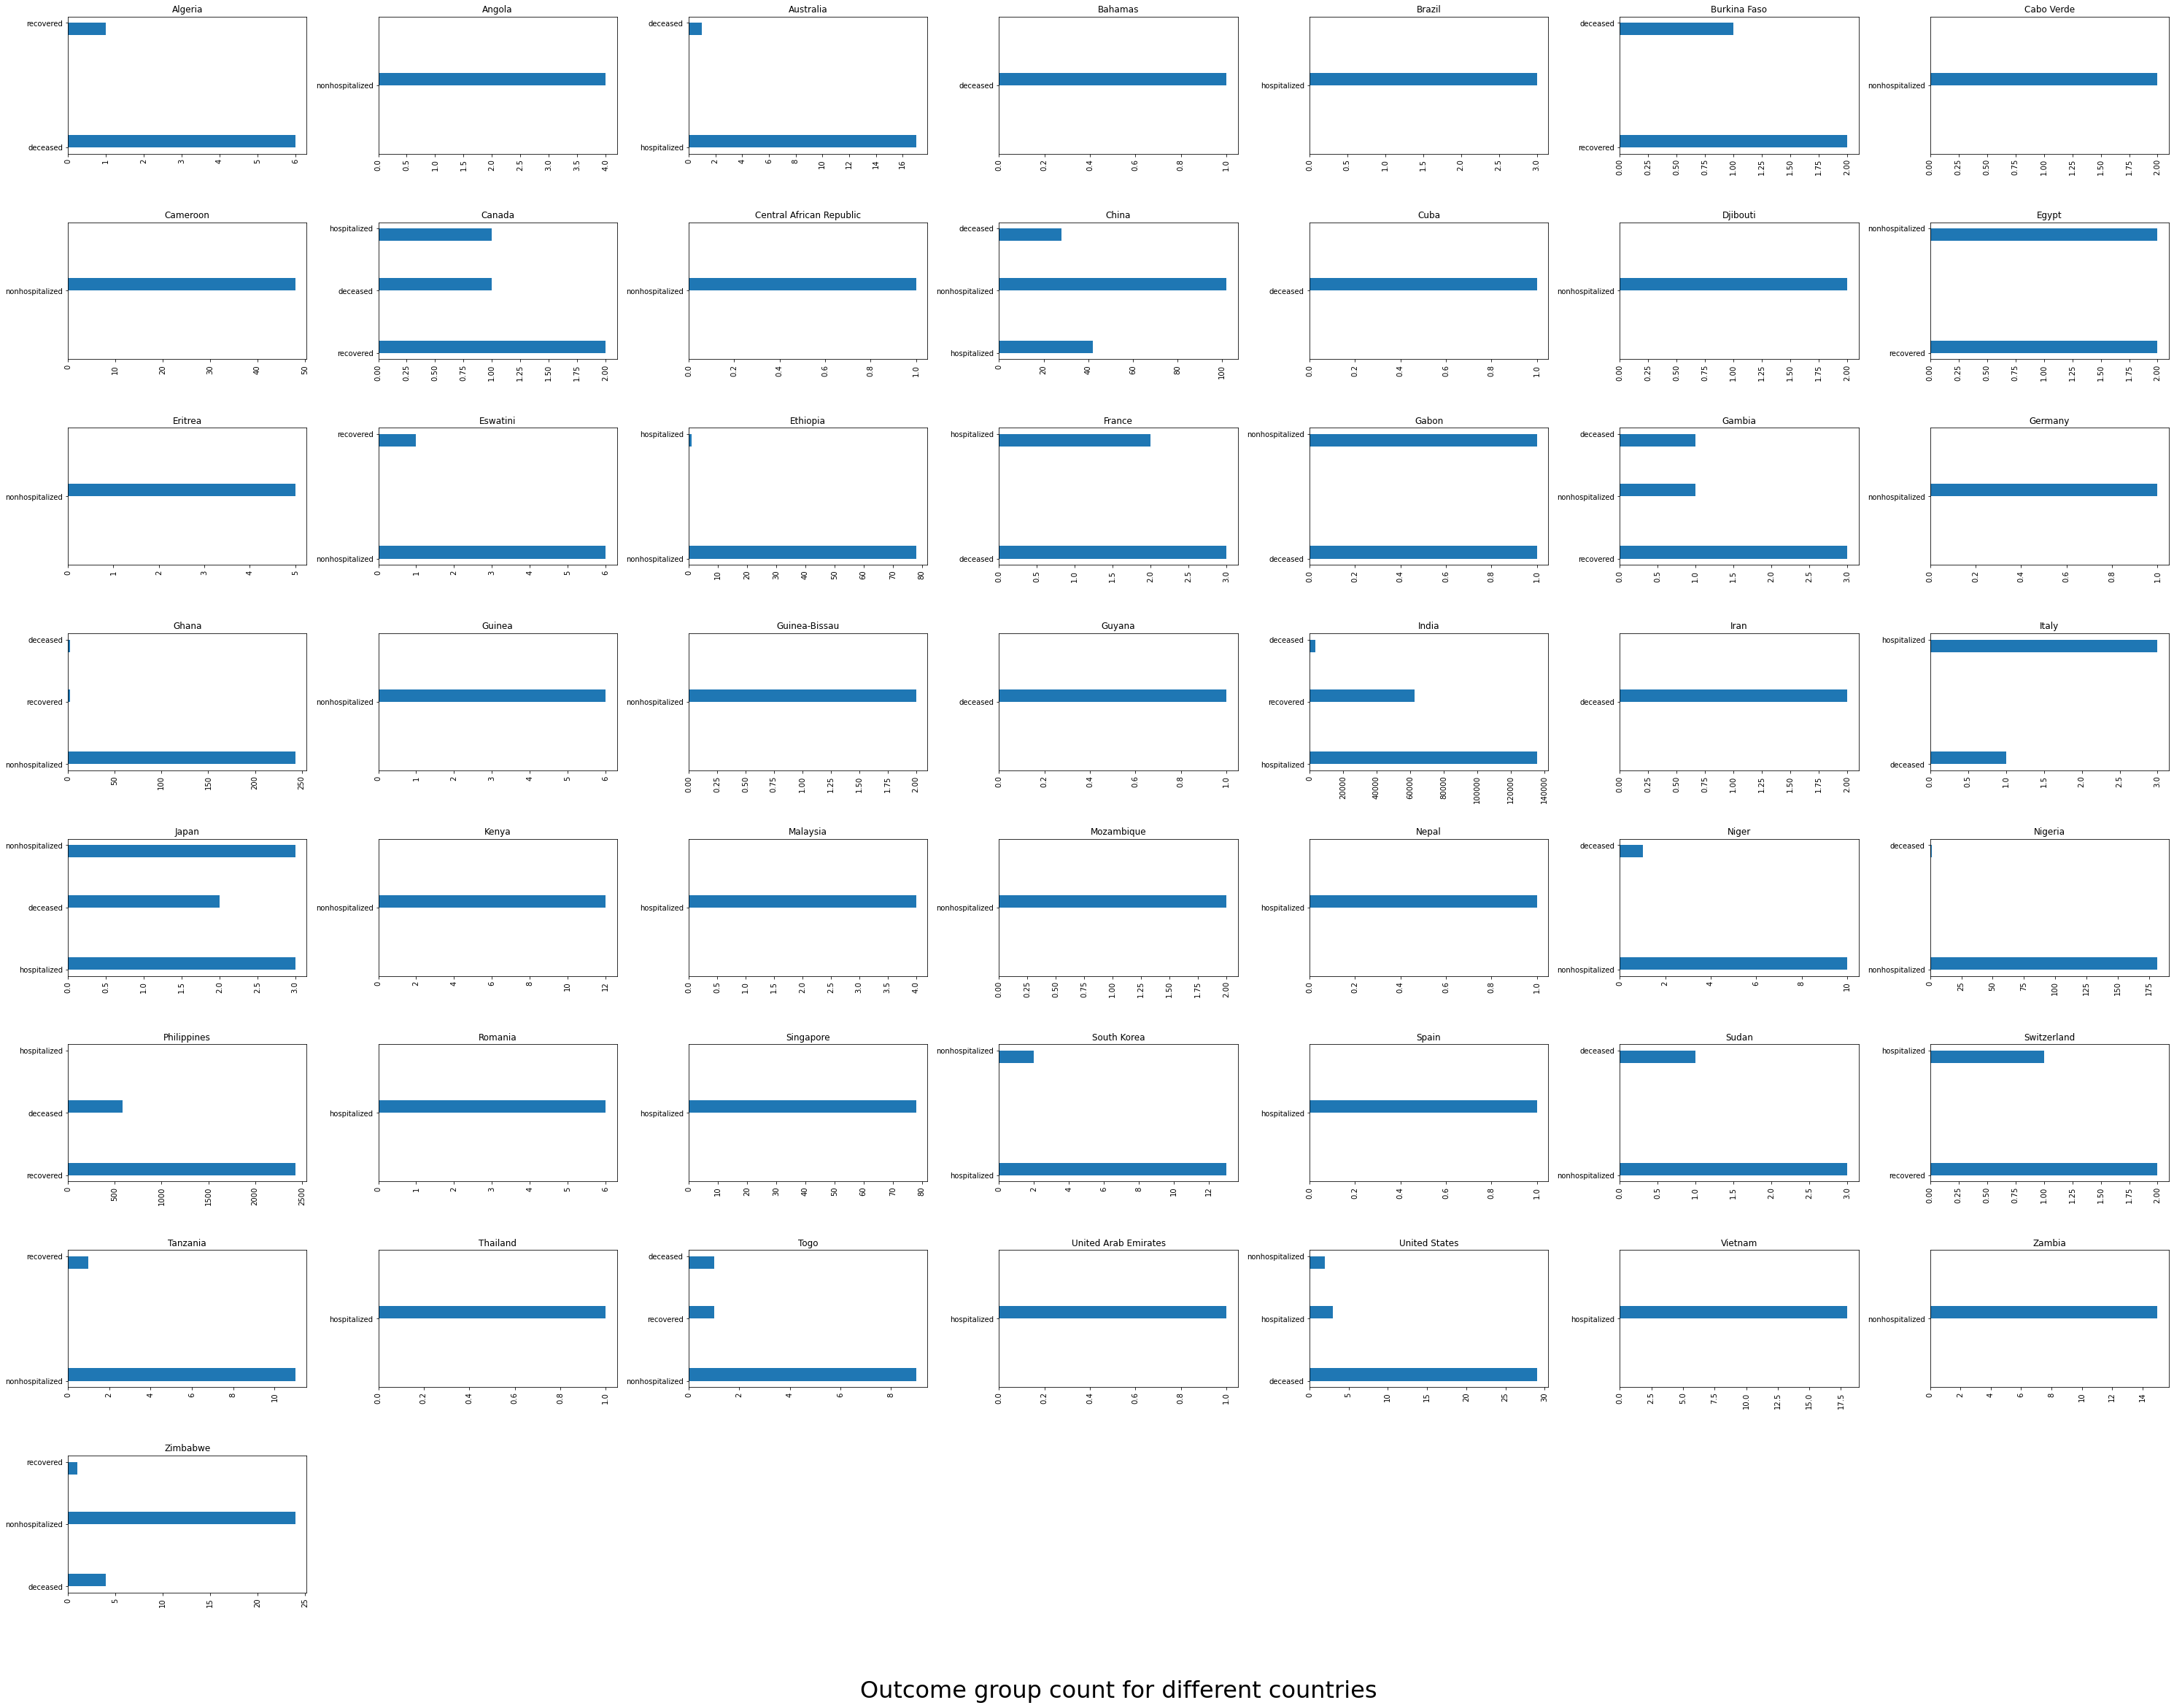

In [11]:
###   outcome histograms   ###


print('Total number of individual in each outcome group')
display(cases_2021_train['outcome_group'].value_counts())
outcome_hist = cases_2021_train['outcome_group'].hist(figsize=(5, 4))
plt.title('Outcome group count', fontsize=12)
plt.show()
outcome_hist_sex = cases_2021_train['outcome_group'].hist(by=cases_2021_train['sex'],figsize=(5, 4))
plt.figtext(0.5, - 0.19, 'Outcome group count for different sexes', wrap=True, horizontalalignment='center', fontsize=12)
plt.show()
outcome_hist_country = cases_2021_train['outcome_group'].hist(by=cases_2021_train['country'],figsize=(50, 40), orientation="horizontal")
plt.figtext(0.5, 0.1, 'Outcome group count for different countries', wrap=True, horizontalalignment='center', fontsize=32)
plt.show()

Location

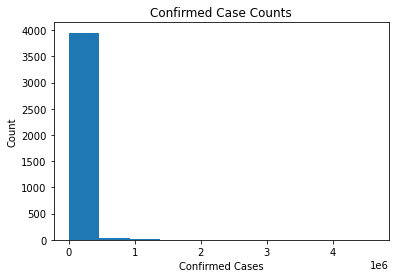

In [12]:
plt.figure()
plt.title("Confirmed Case Counts")
plt.xlabel("Confirmed Cases")
plt.ylabel("Count")
plt.hist(location_2021['Confirmed'])
plt.show()

In [13]:
print('Mean confirmed cases across all countries: ' + str(location_2021['Confirmed'].mean()))
print('Standard deviation of confirmed cases across all countries: ' + str(location_2021['Confirmed'].std()))
print('Median confirmed cases across all countries: ' + str(location_2021['Confirmed'].median()))
print('Maximum confirmed cases across all countries: ' + str(location_2021['Confirmed'].max()))
print('Minimum confirmed cases across all countries: ' + str(location_2021['Confirmed'].min()))

Mean confirmed cases across all countries: 32300.356393606395
Standard deviation of confirmed cases across all countries: 166884.39234057348
Median confirmed cases across all countries: 2885.5
Maximum confirmed cases across all countries: 4611392
Minimum confirmed cases across all countries: 0


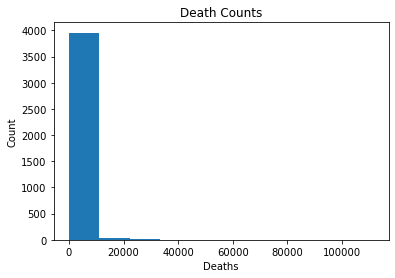

In [14]:
plt.figure()
plt.title("Death Counts")
plt.xlabel("Deaths") 
plt.ylabel("Count")
plt.hist(location_2021['Deaths'])
plt.show()

In [15]:
print('Mean deaths across all countries: ' + str(location_2021['Deaths'].mean()))
print('Standard deviation of deaths across all countries: ' + str(location_2021['Deaths'].std()))
print('Median deaths across all countries: ' + str(location_2021['Deaths'].median()))
print('Maximum deaths across all countries: ' + str(location_2021['Deaths'].max()))
print('Minimum deaths across all countries: ' + str(location_2021['Deaths'].min()))

Mean deaths across all countries: 726.7072927072927
Standard deviation of deaths across all countries: 4083.385290804897
Median deaths across all countries: 53.0
Maximum deaths across all countries: 111489
Minimum deaths across all countries: 0


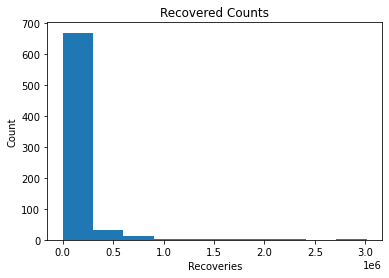

In [16]:
plt.figure()
plt.title("Recovered Counts")
plt.xlabel("Recoveries") 
plt.ylabel("Count")
plt.hist(location_2021['Recovered'])
plt.show()

In [17]:
print('Mean recovered cases across all countries: ' + str(location_2021['Recovered'].mean()))
print('Standard deviation of recovered cases across all countries: ' + str(location_2021['Recovered'].std()))
print('Median recovered cases across all countries: ' + str(location_2021['Recovered'].median()))
print('Maximum recovered cases across all countries: ' + str(location_2021['Recovered'].max()))
print('Minimum recovered cases across all countries: ' + str(location_2021['Recovered'].min()))

Mean recovered cases across all countries: 100300.81481481482
Standard deviation of recovered cases across all countries: 274010.2165936678
Median recovered cases across all countries: 13740.0
Maximum recovered cases across all countries: 3014226.0
Minimum recovered cases across all countries: 0.0


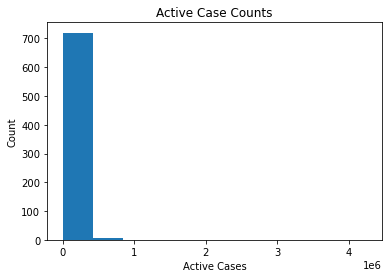

In [18]:
plt.figure()
plt.title("Active Case Counts")
plt.xlabel("Active Cases") 
plt.ylabel("Count")
plt.hist(location_2021['Active'])
plt.show()

In [19]:
print('Mean active cases across all countries: ' + str(location_2021['Active'].mean()))
print('Standard deviation of active cases across all countries: ' + str(location_2021['Active'].std()))
print('Median active cases across all countries: ' + str(location_2021['Active'].median()))
print('Maximum active cases across all countries: ' + str(location_2021['Active'].max()))
print('Minimum active cases across all countries: ' + str(location_2021['Active'].min()))

Mean active cases across all countries: 36416.57475994513
Standard deviation of active cases across all countries: 218469.87278898907
Median active cases across all countries: 2602.0
Maximum active cases across all countries: 4251829.0
Minimum active cases across all countries: 0.0


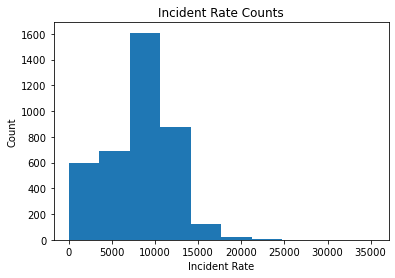

In [20]:
plt.figure()
plt.title("Incident Rate Counts")
plt.xlabel("Incident Rate") 
plt.ylabel("Count")
plt.hist(location_2021['Incident_Rate'])
plt.show()

In [21]:
print('Mean incident rate across all countries: ' + str(location_2021['Incident_Rate'].mean()))
print('Standard deviation of incident rate across all countries: ' + str(location_2021['Incident_Rate'].std()))
print('Median incident rate across all countries: ' + str(location_2021['Incident_Rate'].median()))
print('Maximum incident rate across all countries: ' + str(location_2021['Incident_Rate'].max()))
print('Minimum incident rate across all countries: ' + str(location_2021['Incident_Rate'].min()))

Mean incident rate across all countries: 8171.695608217229
Standard deviation of incident rate across all countries: 3915.612165394245
Median incident rate across all countries: 8754.61085922856
Maximum incident rate across all countries: 35307.704999175054
Minimum incident rate across all countries: 0.0


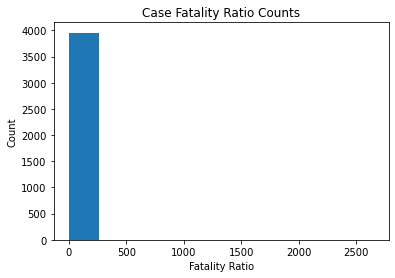

In [22]:
plt.figure()
plt.title("Case Fatality Ratio Counts")
plt.xlabel("Fatality Ratio") 
plt.ylabel("Count")
plt.hist(location_2021['Case_Fatality_Ratio'])
plt.show()

In [23]:
print('Mean case fatality ratio across all countries: ' + str(location_2021['Case_Fatality_Ratio'].mean()))
print('Standard deviation of case fatality ratio across all countries: ' + str(location_2021['Case_Fatality_Ratio'].std()))
print('Median case fatality ratio across all countries: ' + str(location_2021['Case_Fatality_Ratio'].median()))
print('Maximum case fatality ratio across all countries: ' + str(location_2021['Case_Fatality_Ratio'].max()))
print('Minimum case fatality ratio across all countries: ' + str(location_2021['Case_Fatality_Ratio'].min()))

Mean case fatality ratio across all countries: 2.7541513165881844
Standard deviation of case fatality ratio across all countries: 42.18976512055674
Median case fatality ratio across all countries: 1.7811701304600207
Maximum case fatality ratio across all countries: 2648.8372093023254
Minimum case fatality ratio across all countries: 0.0


In [24]:
location_2021[location_2021['Case_Fatality_Ratio'] > 2000]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
1355,Illinois,US,2021-04-01 04:27:05,NaN,NaN,86,2278,NaN,NaN,"Unassigned, Illinois, US",NaN,2648.837209


In [25]:
###   stat by country   ###

country_stat = location_2021.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered']].sum()
country_stat = country_stat[['Confirmed', 'Deaths', 'Recovered']].astype('int')
country_stat = country_stat.reset_index()

location = location_2021.drop_duplicates(subset = ['Country_Region'])
country_stat  = pd.merge(country_stat,location[['Country_Region','Lat', 'Long_']],
                         on='Country_Region', how='left')
#  fixes  #
country_stat['Country_Region'] = country_stat['Country_Region'].replace(
    ['US'],'United States of America')
country_stat['Country_Region'] = country_stat['Country_Region'].replace(
    ['Congo (Brazzaville)'],'Congo')
country_stat['Country_Region'] = country_stat['Country_Region'].replace(
    ['Congo (Kinshasa)'],'Dem. Rep. Congo')
country_stat['Country_Region'] = country_stat['Country_Region'].replace(
    ['Central African Republic'],'Central African Rep.')
country_stat['Country_Region'] = country_stat['Country_Region'].replace(
    ['South Sudan'],'S. Sudan')
country_stat['Country_Region'] = country_stat['Country_Region'].replace(
    ['Denmark'],'Greenland')

Top 10 countries with most confirmed cases


0    United States of America
1                      Brazil
2                       India
3                      France
4                      Russia
5              United Kingdom
6                       Italy
7                      Turkey
8                       Spain
9                     Germany
Name: Country_Region, dtype: object

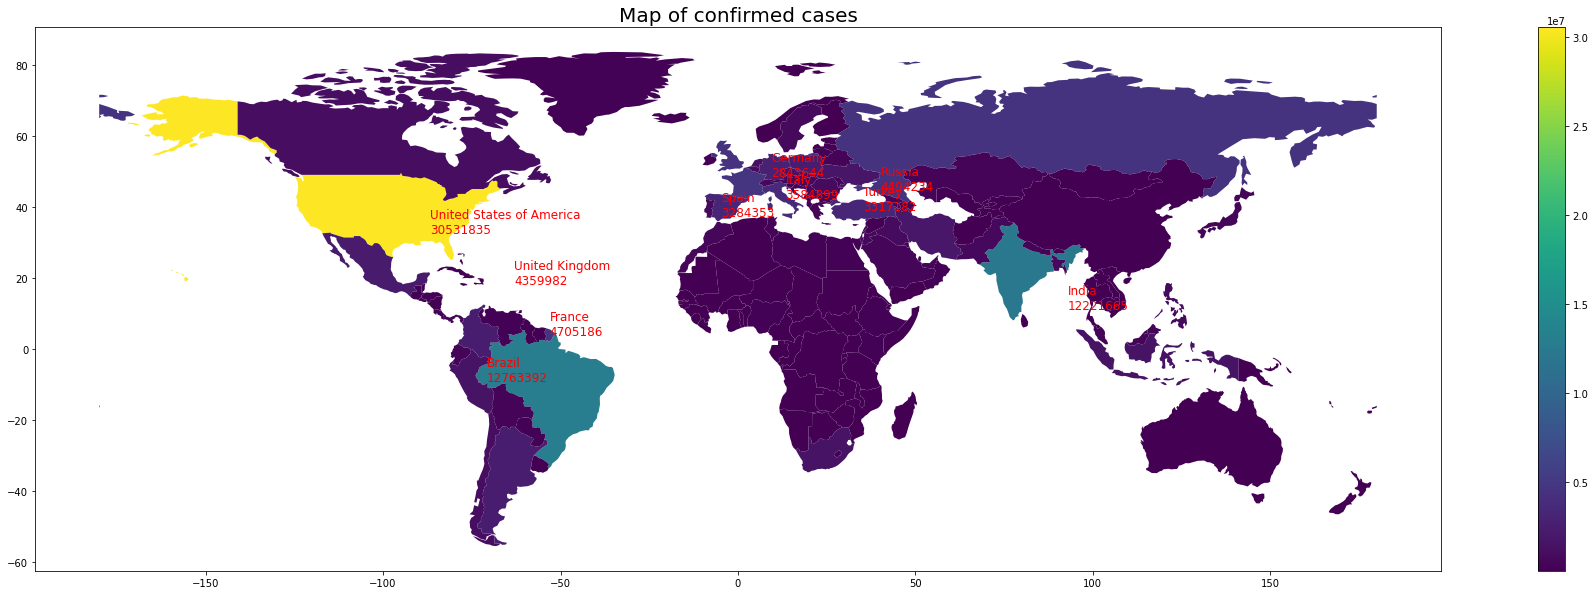

Top 10 countries with most death cases


0    United States of America
1                      Brazil
2                      Mexico
3                       India
4                        Peru
5              United Kingdom
6                       Italy
7                      Russia
8                      France
9                     Germany
Name: Country_Region, dtype: object

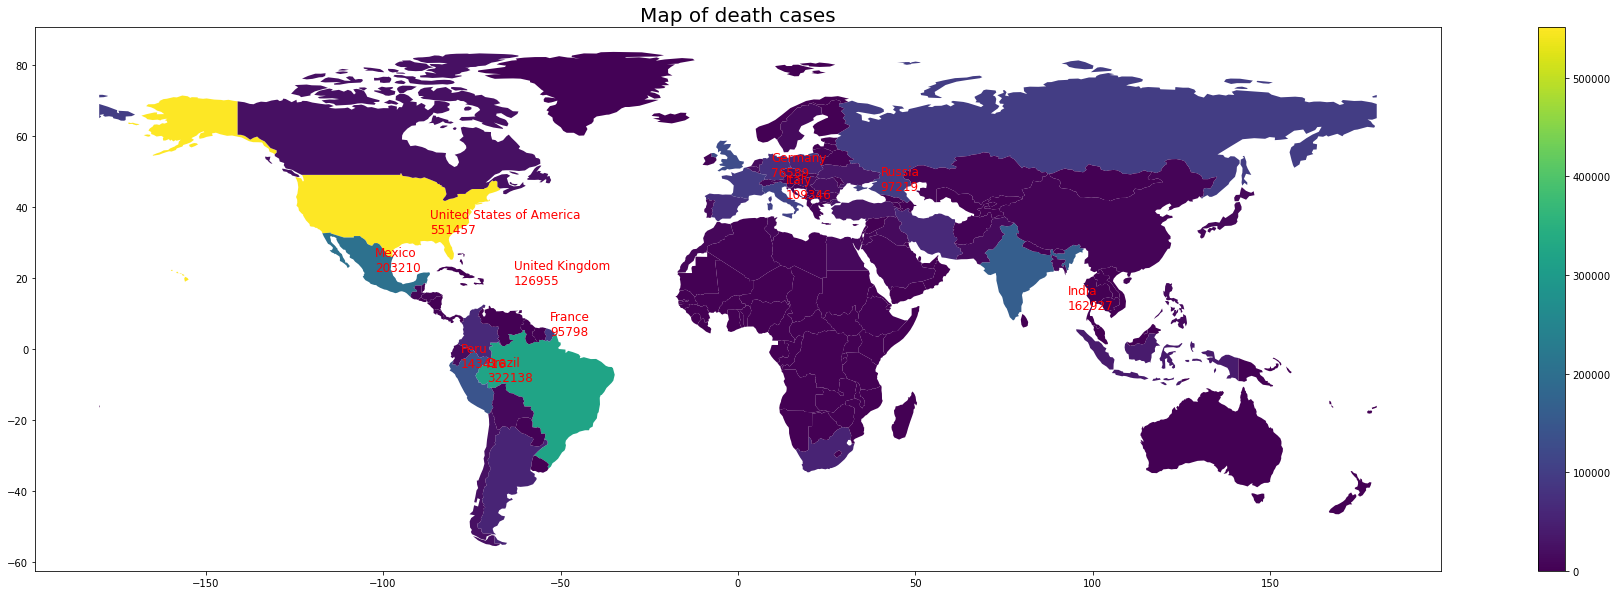

Top 10 countries with most recovered cases


0        India
1       Brazil
2       Russia
3       Turkey
4        Italy
5      Germany
6     Colombia
7    Argentina
8       Poland
9       Mexico
Name: Country_Region, dtype: object

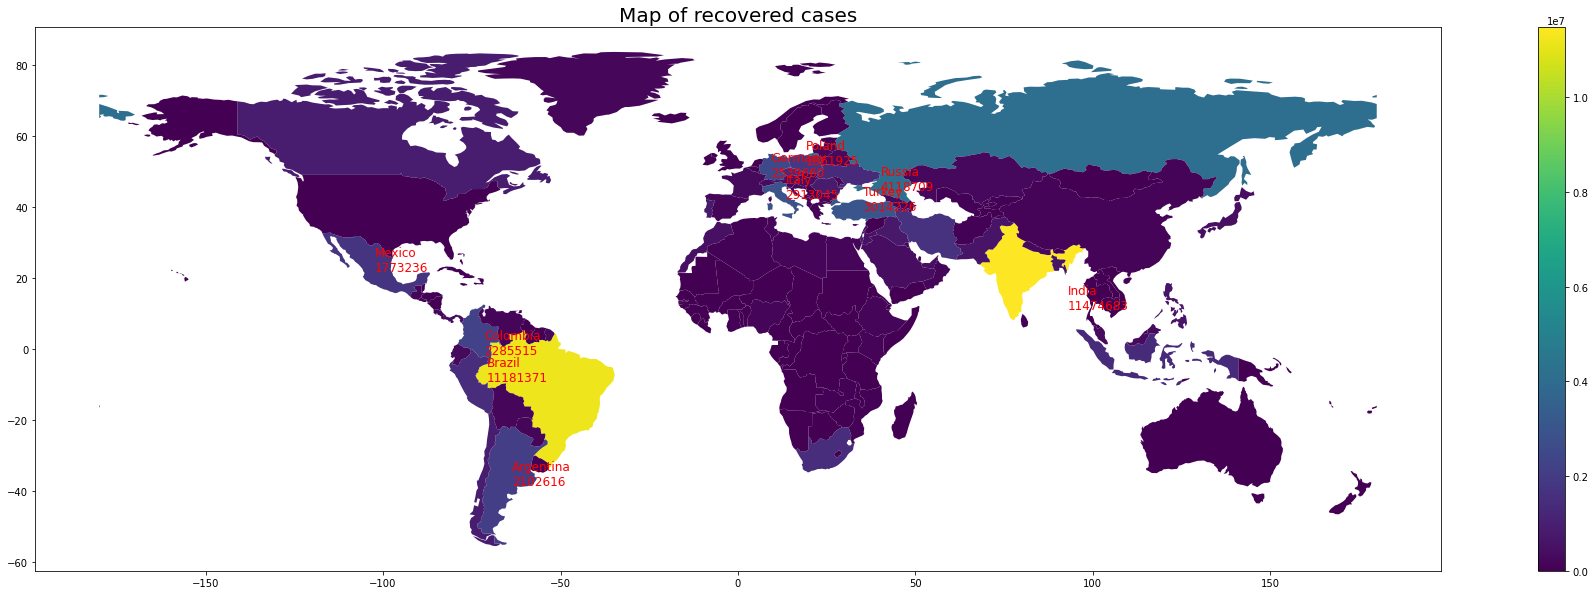

In [26]:
###    geopanda world merged   ###
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.columns = ['pop_est', 'continent', 'Country_Region', 'CODE', 'gdp_md_est', 'geometry']
merge = world.merge(country_stat,on='Country_Region')

###    plot by Confirmed   ###
merge = merge.sort_values(by=['Confirmed'], ascending=False).reset_index()
merge.plot(column='Confirmed', figsize=(35, 10),
           legend=True, cmap='viridis')
print("Top 10 countries with most confirmed cases")
display(merge['Country_Region'].head(10))
# show top 10 names #
for i in range(0, 10):
    plt.text(float(merge.Long_[i]), float(merge.Lat[i]),
             "{}\n{}".format(merge.Country_Region[i],
                                 merge.Confirmed[i]),
             size=12, c='r')
    
plt.title('Map of confirmed cases', fontsize=20)
plt.show()

###    plot by Deaths   ###
merge = merge.sort_values(by=['Deaths'], ascending=False).reset_index()
merge.plot(column='Deaths', figsize=(35, 10),
           legend=True, cmap='viridis')
print("Top 10 countries with most death cases")
display(merge['Country_Region'].head(10))
# show top 10 names #
for i in range(0, 10):
    plt.text(float(merge.Long_[i]), float(merge.Lat[i]),
             "{}\n{}".format(merge.Country_Region[i],
                                 merge.Deaths[i]),
             size=12, c='r')
    
plt.title('Map of death cases', fontsize=20)
plt.show()

###    plot by Recovered  ###
merge = merge.sort_values(by=['Recovered'], ascending=False).reset_index(drop=True)
merge.plot(column='Recovered', figsize=(35, 10),
           legend=True, cmap='viridis')
print("Top 10 countries with most recovered cases")
display(merge['Country_Region'].head(10))
# show top 10 names #
for i in range(0, 10):
    plt.text(float(merge.Long_[i]), float(merge.Lat[i]),
             "{}\n{}".format(merge.Country_Region[i],
                                 merge.Recovered[i]),
             size=12, c='r')
    
plt.title('Map of recovered cases', fontsize=20)
plt.show()


####
#  Citations: https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b
####

In [27]:
###   NaN value counts   ###

print("Train:")
print(cases_2021_train.shape)
for col in cases_2021_train.columns:
    print(col + ": " + str(cases_2021_train[col].isna().sum()) + " NaN values")
print("\nTest:")    
print(cases_2021_test.shape)
for col in cases_2021_test.columns:
    print(col + ": " + str(cases_2021_test[col].isna().sum()) + " NaN values")
print("\nLocation:")
print(location_2021.shape)
for col in location_2021.columns:
    print(col + ": " + str(location_2021[col].isna().sum()) + " NaN values")

Train:
(205846, 11)
age: 182793 NaN values
sex: 180362 NaN values
province: 604 NaN values
country: 1 NaN values
latitude: 0 NaN values
longitude: 0 NaN values
date_confirmation: 51 NaN values
additional_information: 193444 NaN values
source: 18394 NaN values
chronic_disease_binary: 0 NaN values
outcome_group: 0 NaN values

Test:
(101387, 11)
age: 90013 NaN values
sex: 88765 NaN values
province: 296 NaN values
country: 1 NaN values
latitude: 0 NaN values
longitude: 0 NaN values
date_confirmation: 23 NaN values
additional_information: 95206 NaN values
source: 9160 NaN values
chronic_disease_binary: 0 NaN values
outcome_group: 101387 NaN values

Location:
(4004, 12)
Province_State: 174 NaN values
Country_Region: 0 NaN values
Last_Update: 0 NaN values
Lat: 89 NaN values
Long_: 89 NaN values
Confirmed: 0 NaN values
Deaths: 0 NaN values
Recovered: 3275 NaN values
Active: 3275 NaN values
Combined_Key: 0 NaN values
Incident_Rate: 90 NaN values
Case_Fatality_Ratio: 48 NaN values
